# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Exercise 01.1

The aim of this exercise is to test our random numbers generator, by making three different tests.



1. The first test consists in generating $M$ **random numbers** $r$, uniformly distributed between $0$ and $1$, and verifying that the average value of the numbers generated $\langle r \rangle = \int_0^1 r dr$ is equal to $1/2$.
To compute the average the **blocking methodéé was used, generating $M = 10^5$ numbers, grouped in $N=100$ blocks of $L=M/N=1000$ numbers each.
The plot below shows the values obtained for $\langle r \rangle$ as a function of the number of blocks, $N$. The error on the values is calculated as the Standard Deviation of the mean $\frac{\sigma}{\sqrt{N-1}}$.

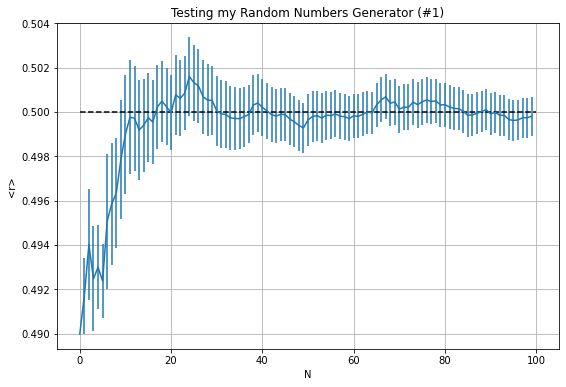

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Loading from file
x, y, error = np.loadtxt ("Data_01_1.dat", unpack = "true" ) 

#Plotting graph
figure = plt.figure (figsize=(9, 6))
plt.errorbar (x, y, yerr=error)
plt.hlines (0.5, 0, 100, color="black", linestyles="dashed")
plt.xlabel("N")
plt.ylabel("<r>")
plt.title("Testing my Random Numbers Generator (#1)")
plt.grid("true")

plt.show()

As we can see, $\langle r \rangle$ converges quite quickly to the expected value $1/2$. This is a sign that the generator works well.

2. The second test consists in generating $M$ random numbers $r$, uniformly distributed between $0$ and $1$, and verifying that the **standard deviation** $\sigma^2 = \int_0^1 (r-1/2)^2 dr$ is equal to $1/12$.
As for the previous calculation, the blocking method was used, generating $M = 10^5$ numbers, grouped in $N=100$ blocks of $L=M/N=1000$ numbers each.
The plot below shows the values obtained for $\sigma^2$ as a function of the number of blocks, $N$. The error on the values is calculated as the Standard Deviation of the mean $\frac{\sigma}{\sqrt{N-1}}$.

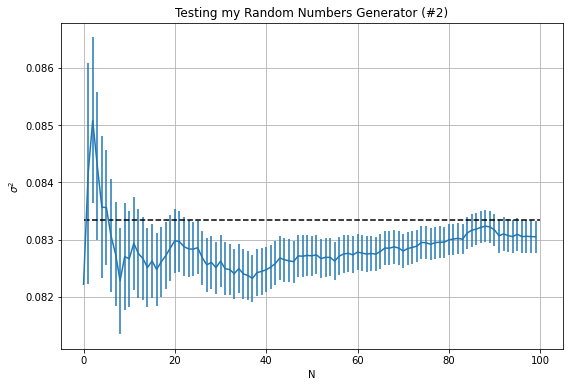

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Loading from file
x, y, error = np.loadtxt ("Sigma_01_1.dat", unpack = "true" ) 

#Plotting graph
figure = plt.figure (figsize=(9, 6))
plt.errorbar (x, y, yerr=error)
plt.hlines (1/12, 0, 100, color="black", linestyles="dashed")
plt.xlabel("N")
plt.ylabel("$\sigma^2$")
plt.title("Testing my Random Numbers Generator (#2)")
plt.grid("true")

plt.show()



Also in this case, $\sigma^2$ converges quite quickly to the expected value $1/12$. The precision of the convergence, though, fluctuates according to the seed given to the generator. Anyway, in general the distance between the results and the expected value after $N$ blocks is within the error calculated. 

3. The third part of the exercise consists in implementing the $\chi^2$ test, to verify the effective uniformity of the numbers generated.
In order to do so, I divided the interval $[0, 1)$ into $M=100$ bins, I generated $n=10000$ random numbers and I counted how many of the numbers generated fell in each bin ( $n_i$ ). I then calculated the Chi Square as $\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$, where $n/M$ is the expected value for every bin. 
I repeated the procedure 100 times, the plot below shows my results for each of the 100 times.


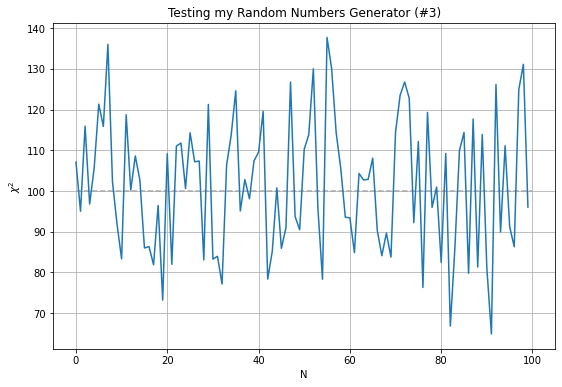

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Loading from file
x, y = np.loadtxt ("Chi_01_1.dat", unpack = "true" ) 

#Plotting graph
figure = plt.figure (figsize=(9, 6))
plt.plot (x, y)
plt.xlabel("N")
plt.ylabel("$\chi^2$")
plt.title("Testing my Random Numbers Generator (#3)")
plt.grid("true")
plt.hlines (100, 0, 100, color="darkgray", linestyle="dashed")

plt.show()

The plot shows that the value of $\chi^2$ fluctuates around the expectation value of $\chi^2=100$, but the fluctuation is quite large. Therefore, we cannot completely confirm the uniformity of the numbers generated.

## Exercise 01.2

The aim of this exercise is to verify the **Central Limit Theorem** using three different distributions: Uniform, exponential and Lorentzian.

First, I added to the random numbers generator two more methods, one to generate random numers with exponential distribution, and one to generate random numbers with a Cauchy-Lorentz distribution. To implement both of them I used the method of the **inversion of the cumulative distribution**.

I then filled 4 histograms per distribution with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled according to the distributions mentioned above.

#### Figure 1: uniform distribution

Below are shown the 4 histograms obtained sampling random numbers uniformly distributed. I fitted the fourth one (the case $N=100$) with a Gaussian, according to the CLT.

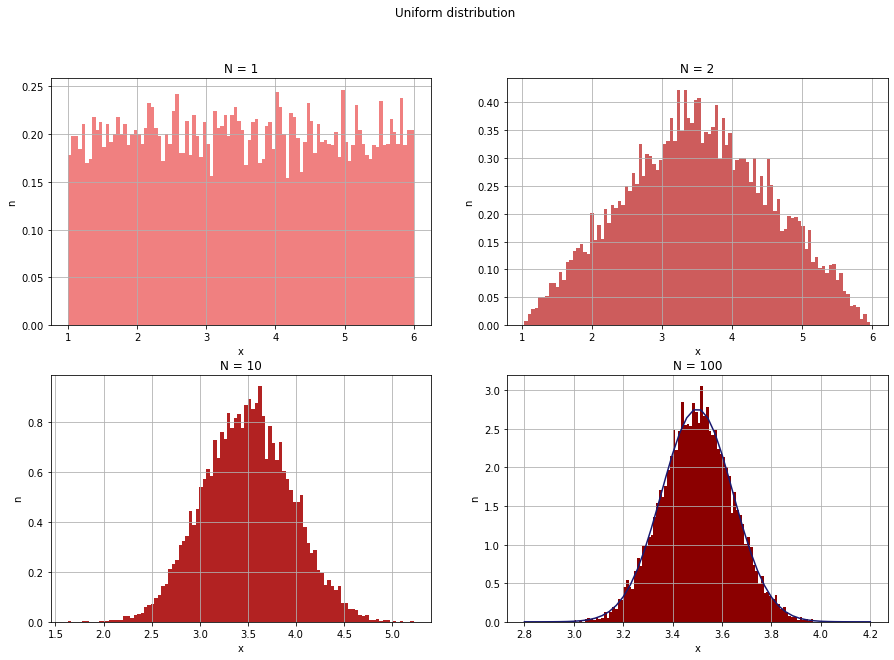

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm 

#Loading from file
u1 = np.loadtxt ("Unif.dat", max_rows=10000)
u2 = np.loadtxt ("Unif.dat", skiprows=10000, max_rows=10000)
u10 = np.loadtxt ("Unif.dat", skiprows=20000, max_rows=10000)
u100 = np.loadtxt ("Unif.dat", skiprows=30000, max_rows=10000)

#Creating figure
figure = plt.figure (figsize = (15, 10))
plt.suptitle ("Uniform distribution")

#Plotting graphs
plt.subplot(2, 2, 1)
plt.hist (u1, bins=100, density=True, color="lightcoral")
plt.title ("N = 1")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

plt.subplot(2, 2, 2)
plt.hist (u2, bins=100, density=True, color="indianred")
plt.title ("N = 2")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

plt.subplot(2, 2, 3)
plt.hist (u10, bins=100, density=True, color="firebrick")
plt.title ("N = 10")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

plt.subplot(2, 2, 4)
plt.hist (u100, bins=100, density=True, color="darkred")
plt.title ("N = 100")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

#Gaussian fit
par = norm.fit (u100)
x = np.linspace (2.8, 4.2)
y = norm.pdf (x, *par)
plt.plot (x, y, color="midnightblue")


plt.show()

#### Figure 2: exponential distribution

Below are shown the 4 histograms obtained sampling random numbers exponentially distributed. I fitted the fourth one (the case $N=100$) with a Gaussian, according to the CLT.

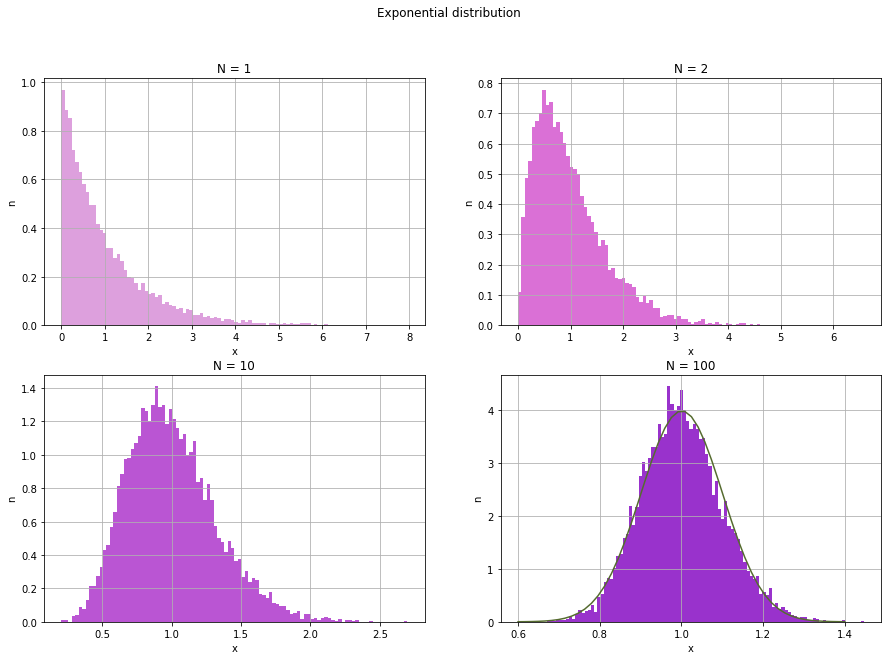

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm 

#Loading from file
e1 = np.loadtxt ("Exp.dat", max_rows=10000)
e2 = np.loadtxt ("Exp.dat", skiprows=10000, max_rows=10000)
e10 = np.loadtxt ("Exp.dat", skiprows=20000, max_rows=10000)
e100 = np.loadtxt ("Exp.dat", skiprows=30000, max_rows=10000)

#Creating figure
figure = plt.figure (figsize = (15, 10))
plt.suptitle ("Exponential distribution")

#Plotting graphs
plt.subplot(2, 2, 1)
plt.hist (e1, bins=100, density=True, color="plum")
plt.title ("N = 1")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

plt.subplot(2, 2, 2)
plt.hist (e2, bins=100, density=True, color="orchid")
plt.title ("N = 2")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

plt.subplot(2, 2, 3)
plt.hist (e10, bins=100, density=True, color="mediumorchid")
plt.title ("N = 10")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

plt.subplot(2, 2, 4)
plt.hist (e100, bins=100, density=True, color="darkorchid")
plt.title ("N = 100")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

#Gaussian fit
par = norm.fit (e100)
x = np.linspace (0.6, 1.4)
y = norm.pdf (x, *par)
plt.plot (x, y, color="darkolivegreen")


plt.show()

#### Figure 3: Lorentz distribution

Below are shown the 4 histograms obtained sampling random numbers following the Lorentzian distibution. In this case, the numbers are generated with infinite variance, so I fitted the fourth one (the case $N=100$) with a Lorentzian.

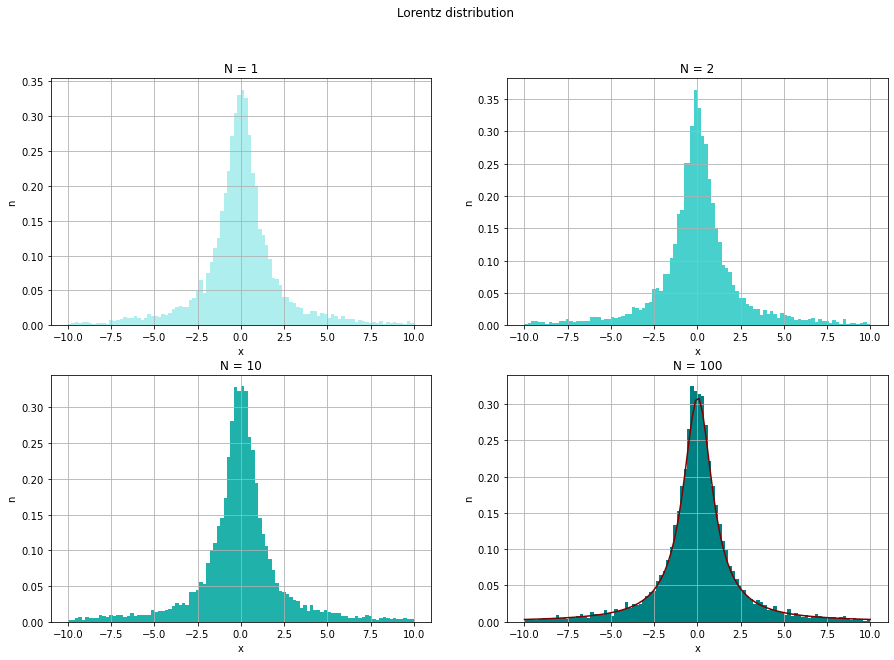

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import cauchy 

#Loading from file
l1 = np.loadtxt ("Lor.dat", max_rows=10000)
l2 = np.loadtxt ("Lor.dat", skiprows=10000, max_rows=10000)
l10 = np.loadtxt ("Lor.dat", skiprows=20000, max_rows=10000)
l100 = np.loadtxt ("Lor.dat", skiprows=30000, max_rows=10000)

#Creating figure
figure = plt.figure (figsize = (15, 10))
plt.suptitle ("Lorentz distribution")

#Plotting graphs
plt.subplot(2, 2, 1)
plt.hist (l1, bins=100, range=(-10,10), density=True, color="paleturquoise")
plt.title ("N = 1")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

plt.subplot(2, 2, 2)
plt.hist (l2, bins=100, range=(-10,10), density=True, color="mediumturquoise")
plt.title ("N = 2")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

plt.subplot(2, 2, 3)
plt.hist (l10, bins=100, range=(-10,10), density=True, color="lightseagreen")
plt.title ("N = 10")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

plt.subplot(2, 2, 4)
plt.hist (l100, bins=100, range=(-10,10), density=True, color="teal")
plt.title ("N = 100")
plt.xlabel ("x")
plt.ylabel ("n")
plt.grid("true")

#Lorentz fit
par = cauchy.fit (l100)
x = np.linspace (-10,10,100)
y = cauchy.pdf (x, *par)
plt.plot (x, y, color="maroon")


plt.show()

Looking at the histograms, the Central Limit Theorem can be immediately visualised. All the three fits appear very accurate.

## Exercise 01.3

The aim of this exercise is to simulate the **Buffon's experiment**.
The formula at the base of this experiment is $P = 2L/\pi d$, where $P$ is the probability of intersecting one line throwing a needle of length $L$ at random onto a horizontal plane ruled with straight lines at distance $d$.

Simulating a **large** number of throws, the ratio $N_{hit}/N_{thr}$ (where $N_{thr}$ is the total number of throws and $N_{hit}$ is the number of times the needle intersects a line) approximates the probablility $P$, so we can reverse the formula obtaining $$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$




I implemented my simulation working in a $10000x1000$ field. I set $d=1$ and $L=0.8$.

I started sampling two random numbers uniformly distributed between $0$ and $1000$, representing the coordinates of the first end of the needle (end $A$). To set the direction of the needle, I generated two new random numbers, sampled inside the circle with centre in $A$ and radius $0.8$. To do this, I used the **accept-reject** method.
To find the coordinates of the end $B$, i calculated the intersection between the line formed by the sampled points and the circumference with centre in $A$ and radius $0.8$.
Finally, to check if a line was intersected, I made use of the fact that $d=1$ and I compared the integer part of the y-coordinates of $A$ and $B$. If it was the same, the line was not intersected, if it was different, the line was intersected.

I made $M=10^6$ throws and I averaged the values of $\pi$ obtained using the blocking method, with $N=100$.
I then plotted the estimation of  $\pi$ with its uncertainty (Standard Deviation of the mean) as a function of the number of blocks $N$.

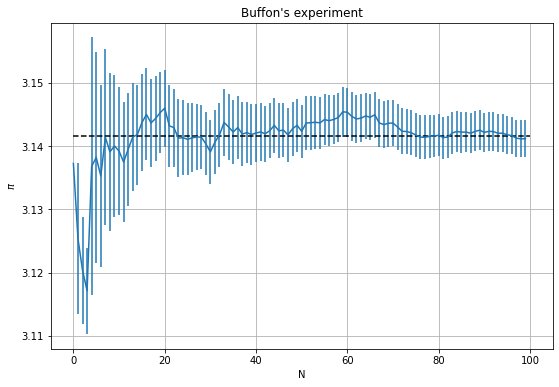

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

#Loading from file
x, y, error = np.loadtxt ("Pi.dat", unpack = "true" ) 

#Plotting graph
figure = plt.figure (figsize=(9, 6))
plt.errorbar (x, y, yerr=error)
plt.hlines (math.pi, 0, 100, color="black", linestyles="dashed")
plt.xlabel("N")
plt.ylabel("$\pi$")
plt.title("Buffon's experiment")
plt.grid("true")

plt.show()

As we can see, the results converge quite well to the known value of $\pi$.